# Foundational AI for Business Applications

This educational notebook demonstrates key concepts from the Foundational AI course with practical business applications. Each section includes:

1.  Topic explanation
2.  Code demonstration
3.  Visual example
4.  Reflective questions

## Course Overview

We'll cover these fundamental AI concepts through business-relevant examples, with a focus on search and optimization:

1.  Search Algorithms: Exploring fundamental search techniques like Breadth-First Search (BFS) and Depth-First Search (DFS) for best path problem-solving.
2.  Informed Search: A\* algorithm to find best path
4.  Advanced Search

In [9]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from collections import deque
import heapq
import random

# Set up plotting
plt.style.use('default')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

BusinessRoute: Represents a delivery network with locations and the connections between them.

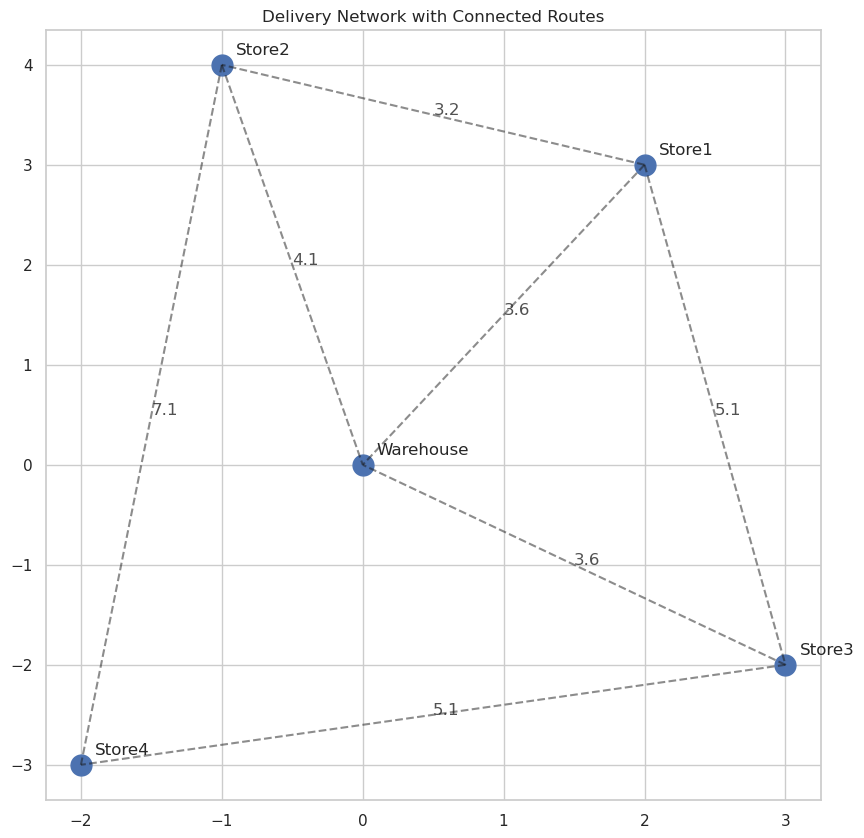

In [10]:
class BusinessRoute:
    """
    Demonstrates problem formulation using a business delivery routing problem
    with only connected routes between locations.
    """
    def __init__(self, locations=None, connected_routes=None):
        # Business locations with (x, y) coordinates
        self.locations = locations
        self.connected_routes = connected_routes
            
    def calculate_route_costs(self):
        """Calculate Euclidean distances only for connected routes"""
        costs = {}
        for loc1, loc2 in self.connected_routes:
            x1, y1 = self.locations[loc1]
            x2, y2 = self.locations[loc2]
            costs[(loc1, loc2)] = np.sqrt((x2-x1)**2 + (y2-y1)**2)
            costs[(loc2, loc1)] = costs[(loc1, loc2)]  # Make bidirectional
        
        self.costs = costs
    
    def visualize_problem(self):
        """Visualize the delivery locations and connected routes"""
        plt.figure(figsize=(10, 10))
        # Plot locations
        for loc, (x, y) in self.locations.items():
            plt.plot(x, y, 'bo', markersize=15)
            plt.text(x+0.1, y+0.1, loc, fontsize=12)
        
        # Plot only connected routes with costs
        for (loc1, loc2), cost in self.costs.items():
            if loc1 < loc2:  # Avoid plotting both directions
                x1, y1 = self.locations[loc1]
                x2, y2 = self.locations[loc2]
                plt.plot([x1, x2], [y1, y2], 'k--', alpha=0.5)
                mid_x = (x1 + x2) / 2
                mid_y = (y1 + y2) / 2
                plt.text(mid_x, mid_y, f'{cost:.1f}', alpha=0.8)
        
        plt.title('Delivery Network with Connected Routes')
        plt.grid(True)
        plt.show()

# Create and visualize the routing problem

locations = {
            'Warehouse': (0, 0),
            'Store1': (2, 3),
            'Store2': (-1, 4),
            'Store3': (3, -2),
            'Store4': (-2, -3)
        }
        
# Define only the connected routes (edges) between locations
connected_routes = [
    ('Warehouse', 'Store1'),
    ('Warehouse', 'Store2'),
    ('Warehouse', 'Store3'),
    ('Store1', 'Store2'),
    ('Store1', 'Store3'),
    ('Store3', 'Store4'),
    ('Store2', 'Store4')
]
        
route_problem = BusinessRoute(locations=locations, connected_routes=connected_routes)
route_problem.calculate_route_costs()
route_problem.visualize_problem()

BusinessSearch: Provides methods to search for paths in the delivery network, specifically using Breadth-First Search (BFS).

Path found: ['Store3', 'Warehouse', 'Store2']


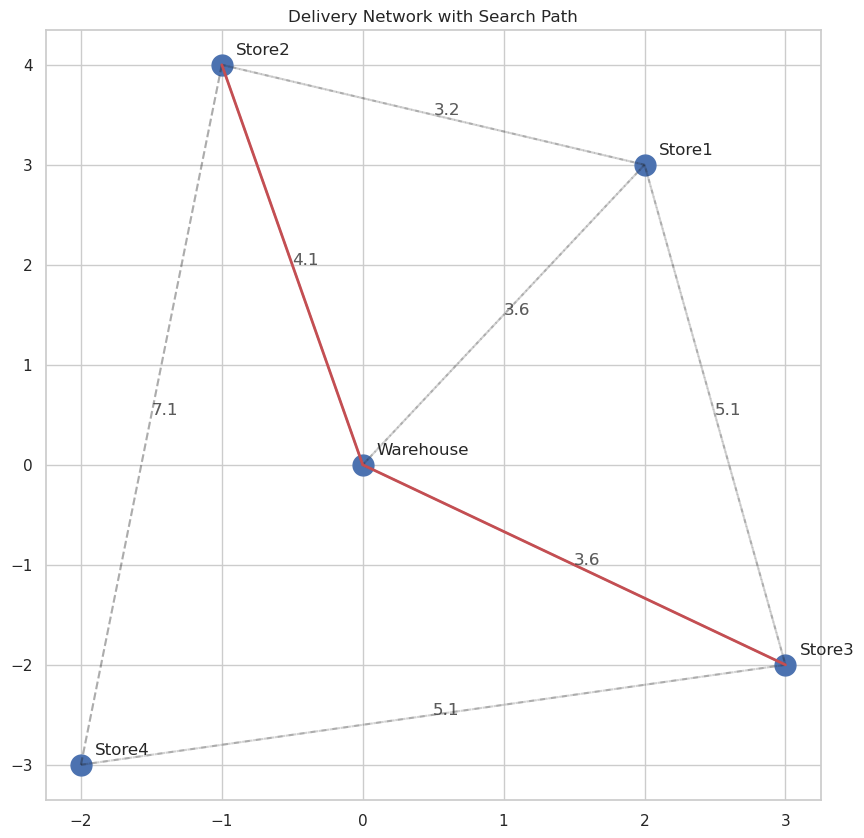

In [11]:
class BusinessSearch:
    def __init__(self, route):
        self.route = route
    
    def breadth_first_search(self, start, goal):
        """Perform BFS from start location to goal location"""
        queue = deque([(start, [start])])  # Store (current_node, path)
        visited = set()
        
        while queue:
            current, path = queue.popleft()
            if current == goal:
                return path
            
            if current not in visited:
                visited.add(current)
                # Find all neighbors of current node
                neighbors = []
                for (loc1, loc2) in self.route.costs:
                    if loc1 == current:
                        neighbors.append(loc2)
                    elif loc2 == current:
                        neighbors.append(loc1)
                
                # Add neighbors to queue with updated path
                for neighbor in neighbors:
                    if neighbor not in visited:
                        queue.append((neighbor, path + [neighbor]))
        
        return None  # No path found
    
    def visualize_search(self, path):
        """Visualize the search process and solution"""
        plt.figure(figsize=(10, 10))
        # Plot locations
        for loc, (x, y) in self.route.locations.items():
            plt.plot(x, y, 'bo', markersize=15)
            plt.text(x+0.1, y+0.1, loc, fontsize=12)
        
        # Plot connections with costs
        for (loc1, loc2), cost in self.route.costs.items():
            x1, y1 = self.route.locations[loc1]
            x2, y2 = self.route.locations[loc2]
            plt.plot([x1, x2], [y1, y2], 'k--', alpha=0.2)
            mid_x = (x1 + x2) / 2
            mid_y = (y1 + y2) / 2
            plt.text(mid_x, mid_y, f'{cost:.1f}', alpha=0.5)
        
        # Plot search path
        if path:
            for i in range(len(path)-1):
                loc1 = path[i]
                loc2 = path[i+1]
                x1, y1 = self.route.locations[loc1]
                x2, y2 = self.route.locations[loc2]
                plt.plot([x1, x2], [y1, y2], 'r-', linewidth=2)
        
        plt.title('Delivery Network with Search Path')
        plt.grid(True)
        plt.show()

            
# Create and demonstrate the search problem
search_problem = BusinessSearch(route_problem)
path = search_problem.breadth_first_search('Store3', 'Store2')
print(f"Path found: {path}")
search_problem.visualize_search(path)

Sets up the BEST path route problem for a more complex map by defining location coordinates and the connections between them, then initializes the BusinessRoute object.

In [12]:
locations = {
            'Warehouse': (0, 0),
            'Store1': (2, 3),
            'Store2': (-1, 4),
            'Store3': (3, -2),
            'Store4': (-2, -3),
            'Store5': (5, 1),
            'Store6': (-3, 2),
            'Store7': (4, 4),
            'Store8': (-4, -1),
            'Store9': (-2, 0)
        }
        
# Updated connected routes (edges) between locations
connected_routes = [
    ('Warehouse', 'Store1'),
    ('Warehouse', 'Store2'),
    ('Warehouse', 'Store3'),
    ('Warehouse', 'Store4'),
    # ('Warehouse', 'Store5'),
    # ('Warehouse', 'Store6'),
    # ('Warehouse', 'Store7'),
    ('Warehouse', 'Store9'),
    ('Store9', 'Store8'),
    ('Store1', 'Store2'),
    ('Store1', 'Store3'),
    ('Store3', 'Store4'),
    ('Store2', 'Store4'),
    ('Store1', 'Store5'),
    ('Store5', 'Store7'),
    ('Store2', 'Store6'),
    ('Store6', 'Store8'),
    ('Store4', 'Store8'),
    ('Store3', 'Store5')
]

route_problem = BusinessRoute(locations=locations, connected_routes=connected_routes)
route_problem.calculate_route_costs()

This section demonstrates the implementation of two fundamental search algorithms: Breadth-First Search (BFS) and Depth-First Search (DFS). The key difference lies in their data structures:

- BFS uses a queue (FIFO - First-In, First-Out) to explore the graph level by level, ensuring the shortest path (in terms of the number of hops) is found.
- DFS uses a stack (LIFO - Last-In, First-Out) to explore as deeply as possible along each branch before backtracking. This can find a path, but it's not guaranteed to be the shortest.
- A* search uses a priority queue to explore nodes, prioritizing those with the lowest estimated total cost. This estimate is the sum of the cost to reach the current node and a heuristic estimate of the cost remaining to the goal. By intelligently exploring the most promising paths first, A* efficiently finds the shortest path based on the defined cost.


--- Results with Realistic Map ---
Start Node: Store8, Goal Node: Store7
BFS path (shortest hops): ['Store8', 'Store4', 'Store3', 'Store5', 'Store7']
DFS path: ['Store8', 'Store9', 'Warehouse', 'Store1', 'Store2', 'Store4', 'Store3', 'Store5', 'Store7']
A* path (shortest cost): ['Store8', 'Store9', 'Warehouse', 'Store1', 'Store5', 'Store7']


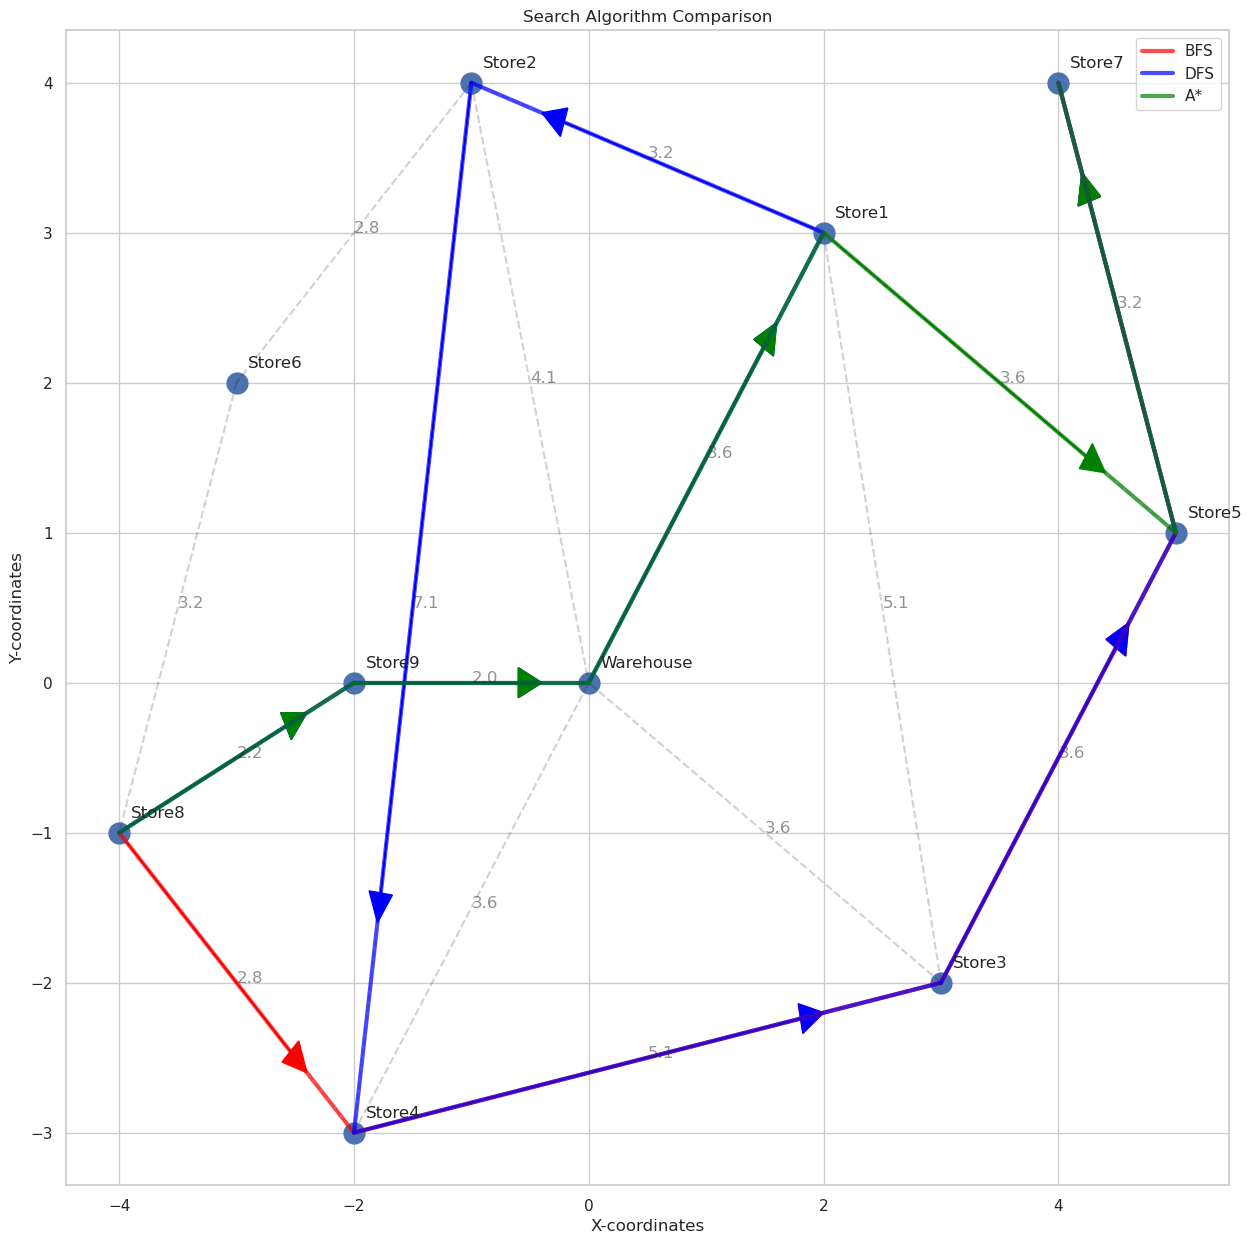

In [13]:
from collections import deque
import heapq
import matplotlib.pyplot as plt
import random
import math

class RouteProblem:
    def __init__(self, locations, costs):
        self.locations = locations
        self.costs = costs

class BusinessSearch:
    def __init__(self, route):
        self.route = route

    def breadth_first_search(self, start, goal):
        """BFS finds the shortest path in terms of number of hops"""
        queue = deque([(start, [start])])
        visited = set()

        while queue:
            current, path = queue.popleft()
            if current == goal:
                return path

            if current not in visited:
                visited.add(current)
                for neighbor in self._get_neighbors(current):
                    if neighbor not in visited:
                        queue.append((neighbor, path + [neighbor]))

        return None

    def depth_first_search(self, start, goal):
        """DFS may find a longer path but explores differently"""
        stack = [(start, [start])]
        visited = set()

        while stack:
            current, path = stack.pop()
            if current == goal:
                return path

            if current not in visited:
                visited.add(current)
                for neighbor in reversed(self._get_neighbors(current)):  # Reverse for DFS order
                    if neighbor not in visited:
                        stack.append((neighbor, path + [neighbor]))

        return None

    def a_star_search(self, start, goal):
        """A* search finds the shortest path based on cost and heuristic"""
        priority_queue = [(0, start, [start])]  # (f_score, current_node, path)
        cost_so_far = {start: 0}

        while priority_queue:
            f_score, current, path = heapq.heappop(priority_queue)

            if current == goal:
                return path

            for neighbor, cost in self._get_weighted_neighbors(current):
                new_cost = cost_so_far[current] + cost
                if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                    cost_so_far[neighbor] = new_cost
                    priority = new_cost + self._heuristic(neighbor, goal)
                    heapq.heappush(priority_queue, (priority, neighbor, path + [neighbor]))

        return None

    def _get_neighbors(self, node):
        """Helper method to get neighboring nodes"""
        neighbors = []
        for (loc1, loc2), cost in self.route.costs.items():
            if loc1 == node:
                neighbors.append(loc2)
            elif loc2 == node:
                neighbors.append(loc1)
        return neighbors

    def _get_weighted_neighbors(self, node):
        """Helper method to get neighboring nodes with associated costs"""
        neighbors = []
        for (loc1, loc2), cost in self.route.costs.items():
            if loc1 == node:
                neighbors.append((loc2, cost))
            elif loc2 == node:
                neighbors.append((loc1, cost))
        return neighbors

    def _heuristic(self, node, goal):
        """Heuristic function: Euclidean distance between two locations"""
        x1, y1 = self.route.locations[node]
        x2, y2 = self.route.locations[goal]
        return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

    def visualize_search_comparison(self, paths, algorithm_names):
        """Visualize multiple search paths for comparison"""
        plt.figure(figsize=(15, 15))

        # Plot locations
        for loc, (x, y) in self.route.locations.items():
            plt.plot(x, y, 'bo', markersize=15)
            plt.text(x + 0.1, y + 0.1, loc, fontsize=12)

        # Plot all connections
        for (loc1, loc2), cost in self.route.costs.items():
            if loc1 < loc2:
                x1, y1 = self.route.locations[loc1]
                x2, y2 = self.route.locations[loc2]
                plt.plot([x1, x2], [y1, y2], 'k--', alpha=0.2)

                mid_x = (x1 + x2) / 2
                mid_y = (y1 + y2) / 2
                plt.text(mid_x, mid_y, f'{cost:.1f}', alpha=0.5)

        # Plot each search path with different colors
        colors = ['red', 'blue', 'green', 'purple', 'orange']
        for i, (path, name) in enumerate(zip(paths, algorithm_names)):
            if path:
                for j in range(len(path) - 1):
                    loc1 = path[j]
                    loc2 = path[j + 1]
                    x1, y1 = self.route.locations[loc1]
                    x2, y2 = self.route.locations[loc2]
                    plt.plot([x1, x2], [y1, y2],
                             color=colors[i % len(colors)],
                             linewidth=3,
                             alpha=0.7,
                             label=f'{name}' if j == 0 else "")
                    # Add arrow
                    plt.arrow(x1, y1, (x2 - x1) * 0.8, (y2 - y1) * 0.8,
                             head_width=0.2, head_length=0.2,
                             fc=colors[i % len(colors)], ec=colors[i % len(colors)],
                             length_includes_head=True)

        plt.title('Search Algorithm Comparison')
        plt.xlabel("X-coordinates")
        plt.ylabel("Y-coordinates")
        plt.legend()
        plt.grid(True)
        plt.show()


# Find paths using different algorithms
start_node, goal_node = 'Store8', 'Store7'

search_problem = BusinessSearch(route_problem)

bfs_path = search_problem.breadth_first_search(start_node, goal_node)
dfs_path = search_problem.depth_first_search(start_node, goal_node)
astar_path = search_problem.a_star_search(start_node, goal_node)

# Print results
print(f"\n--- Results with Realistic Map ---")
print(f"Start Node: {start_node}, Goal Node: {goal_node}")
print(f"BFS path (shortest hops): {bfs_path}")
print(f"DFS path: {dfs_path}")
print(f"A* path (shortest cost): {astar_path}")

# Visualize comparison
search_problem.visualize_search_comparison(
    [bfs_path, dfs_path, astar_path],
    ['BFS', 'DFS', 'A*']
)

A basic Local Search algorithm with Hill Climbing 

In [53]:
import random
import numpy as np
import matplotlib.pyplot as plt

class ResourceAllocationProblem:
    def __init__(self, tasks, resources, efficiency_matrix):
        """
        tasks: list of task names
        resources: list of resource names
        efficiency_matrix: dict of {(task, resource): efficiency_score}
        """
        self.tasks = tasks
        self.resources = resources
        self.efficiency = efficiency_matrix

    def calculate_total_efficiency(self, allocation):
        """
        allocation: dict of {task: resource}
        """
        total_efficiency = 0
        for task, resource in allocation.items():
            total_efficiency += self.efficiency.get((task, resource), 0)
        return total_efficiency

    def get_neighbor(self, allocation):
        """
        Generates a random neighboring allocation by reassigning one task.
        """
        neighbor = allocation.copy()
        task_to_reassign = random.choice(self.tasks)
        current_resource = neighbor[task_to_reassign]
        available_resources = [r for r in self.resources if r != current_resource]
        if available_resources:
            neighbor[task_to_reassign] = random.choice(available_resources)
        return neighbor

    def hill_climbing(self, initial_allocation, max_iterations=1000):
        """
        Performs hill climbing to find a better resource allocation.
        """
        current_allocation = initial_allocation
        current_efficiency = self.calculate_total_efficiency(current_allocation)

        for _ in range(max_iterations):
            neighbor_allocation = self.get_neighbor(current_allocation)
            neighbor_efficiency = self.calculate_total_efficiency(neighbor_allocation)

            if neighbor_efficiency > current_efficiency:
                current_allocation = neighbor_allocation
                current_efficiency = neighbor_efficiency

        return current_allocation, current_efficiency

# Example Usage
tasks = ['Marketing', 'Sales', 'Development', 'Support']
resources = ['TeamA', 'TeamB', 'TeamC']
efficiency_matrix = {
    ('Marketing', 'TeamA'): 8, ('Marketing', 'TeamB'): 6, ('Marketing', 'TeamC'): 5,
    ('Sales', 'TeamA'): 7, ('Sales', 'TeamB'): 9, ('Sales', 'TeamC'): 6,
    ('Development', 'TeamA'): 5, ('Development', 'TeamB'): 7, ('Development', 'TeamC'): 8,
    ('Support', 'TeamA'): 6, ('Support', 'TeamB'): 5, ('Support', 'TeamC'): 9,
}


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame with all combinations, default to 0 if missing
df = pd.DataFrame(0, index=tasks, columns=resources)

# Fill the DataFrame with efficiency values from the matrix
for (task, resource), score in efficiency_matrix.items():
    df.loc[task, resource] = score

print("Efficiency Matrix: \n", df)
# # Plot the heatmap
# plt.figure(figsize=(5, 5))
# sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".0f")
# plt.title("Efficiency of Resources for Each Task")
# plt.xlabel("Resources")
# plt.ylabel("Tasks")
# plt.tight_layout()
# plt.show()


Efficiency Matrix: 
              TeamA  TeamB  TeamC
Marketing        8      6      5
Sales            7      9      6
Development      5      7      8
Support          6      5      9


In [54]:

initial_allocation = {task: random.choice(resources) for task in tasks}
problem = ResourceAllocationProblem(tasks, resources, efficiency_matrix)

print("Initial Allocation:", initial_allocation)
print("Initial Efficiency:", problem.calculate_total_efficiency(initial_allocation))

best_allocation, best_efficiency = problem.hill_climbing(initial_allocation)

print("\nBest Allocation (Hill Climbing):", best_allocation)
print("Best Efficiency (Hill Climbing):", best_efficiency)

Initial Allocation: {'Marketing': 'TeamC', 'Sales': 'TeamC', 'Development': 'TeamA', 'Support': 'TeamC'}
Initial Efficiency: 25

Best Allocation (Hill Climbing): {'Marketing': 'TeamA', 'Sales': 'TeamB', 'Development': 'TeamC', 'Support': 'TeamC'}
Best Efficiency (Hill Climbing): 34


**Problem:** Extend the ResourceAllocationProblem to include constraints (e.g., each team has a maximum capacity of tasks they can handle). Modify the get_neighbor function to respect these constraints and the hill_climbing algorithm to find a valid and high-efficiency allocation.

In [64]:
# Example: Each team can handle at most 2 tasks
resource_capacity = {'TeamA': 2, 'TeamB': 2, 'TeamC': 1}

# Initial allocation that respects constraints
initial_allocation = {
    'Marketing': 'TeamC',
    'Sales': 'TeamA',
    'Development': 'TeamA',
    'Support': 'TeamB'
}

problem = ResourceAllocationNEW(tasks, resources, efficiency_matrix, resource_capacity)

print("Initial Allocation:", initial_allocation)
print("Initial Efficiency:", problem.calculate_total_efficiency(initial_allocation))

best_allocation, best_efficiency = problem.hill_climbing(initial_allocation)

print("\nBest Allocation (with constraints):", best_allocation)
print("Best Efficiency:", best_efficiency)


Initial Allocation: {'Marketing': 'TeamC', 'Sales': 'TeamA', 'Development': 'TeamA', 'Support': 'TeamB'}
Initial Efficiency: 22

Best Allocation (with constraints): {'Marketing': 'TeamA', 'Sales': 'TeamB', 'Development': 'TeamB', 'Support': 'TeamC'}
Best Efficiency: 33


Implement Adverserial search solution for the same problem with MiniMax algorithm

In [68]:
minimax_solver = ResourceAllocationMinimax(tasks, resources, efficiency_matrix, resource_capacity)

value, best_allocation = minimax_solver.minimax({}, tasks, maximizing_player=True, depth=len(tasks))

print("Best Allocation (Minimax):", best_allocation)
print("Efficiency:", value)

Best Allocation (Minimax): {'Marketing': 'TeamA'}
Efficiency: 26


In [65]:
import random
import numpy as np
import matplotlib.pyplot as plt

class ResourceAllocationNEW:
    def __init__(self, tasks, resources, efficiency_matrix, resource_capacity):
        """
        tasks: list of task names
        resources: list of resource names
        efficiency_matrix: dict of {(task, resource): efficiency_score}
        resource_capacity: dict of {resource: max_tasks}
        """
        self.tasks = tasks
        self.resources = resources
        self.efficiency = efficiency_matrix
        self.capacity = resource_capacity

    def calculate_total_efficiency(self, allocation):
        total_efficiency = 0
        for task, resource in allocation.items():
            total_efficiency += self.efficiency.get((task, resource), 0)
        return total_efficiency

    def is_valid_allocation(self, allocation):
        """
        Returns True if allocation respects resource capacity constraints.
        """
        resource_counts = {r: 0 for r in self.resources}
        for resource in allocation.values():
            resource_counts[resource] += 1
        return all(resource_counts[r] <= self.capacity.get(r, float('inf')) for r in self.resources)

    def get_neighbor(self, allocation):
        """
        Generates a neighboring allocation that respects capacity constraints.
        """
        max_attempts = 100
        for _ in range(max_attempts):
            neighbor = allocation.copy()
            task_to_reassign = random.choice(self.tasks)
            current_resource = neighbor[task_to_reassign]

            # Count current resource usage
            usage = {r: 0 for r in self.resources}
            for t, r in neighbor.items():
                usage[r] += 1

            available_resources = [
                r for r in self.resources
                if r != current_resource and usage[r] < self.capacity.get(r, float('inf'))
            ]
            if not available_resources:
                continue

            neighbor[task_to_reassign] = random.choice(available_resources)

            if self.is_valid_allocation(neighbor):
                return neighbor

        return allocation  # fallback if no valid neighbor found

    def hill_climbing(self, initial_allocation, max_iterations=1000):
        current_allocation = initial_allocation
        if not self.is_valid_allocation(current_allocation):
            raise ValueError("Initial allocation violates capacity constraints.")

        current_efficiency = self.calculate_total_efficiency(current_allocation)

        for _ in range(max_iterations):
            neighbor = self.get_neighbor(current_allocation)
            if neighbor == current_allocation:
                continue  # no valid move found

            neighbor_efficiency = self.calculate_total_efficiency(neighbor)

            if neighbor_efficiency > current_efficiency:
                current_allocation = neighbor
                current_efficiency = neighbor_efficiency

        return current_allocation, current_efficiency


In [67]:
class ResourceAllocationMinimax:
    def __init__(self, tasks, resources, efficiency_matrix, resource_capacity):
        self.tasks = tasks
        self.resources = resources
        self.efficiency = efficiency_matrix
        self.capacity = resource_capacity

    def is_valid(self, allocation):
        resource_counts = {r: 0 for r in self.resources}
        for r in allocation.values():
            resource_counts[r] += 1
        return all(resource_counts[r] <= self.capacity.get(r, float('inf')) for r in self.resources)

    def evaluate(self, allocation):
        return sum(self.efficiency.get((t, r), 0) for t, r in allocation.items())

    def minimax(self, allocation, remaining_tasks, maximizing_player, depth):
        if depth == 0 or not remaining_tasks:
            if self.is_valid(allocation):
                return self.evaluate(allocation), allocation
            else:
                return float('-inf') if maximizing_player else float('inf'), allocation

        best_value = float('-inf') if maximizing_player else float('inf')
        best_allocation = None

        task = remaining_tasks[0]
        for resource in self.resources:
            new_allocation = allocation.copy()
            new_allocation[task] = resource

            if not self.is_valid(new_allocation):
                continue

            value, _ = self.minimax(
                new_allocation, 
                remaining_tasks[1:], 
                not maximizing_player, 
                depth - 1
            )

            if maximizing_player:
                if value > best_value:
                    best_value = value
                    best_allocation = new_allocation
            else:
                if value < best_value:
                    best_value = value
                    best_allocation = new_allocation

        return best_value, best_allocation
